In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

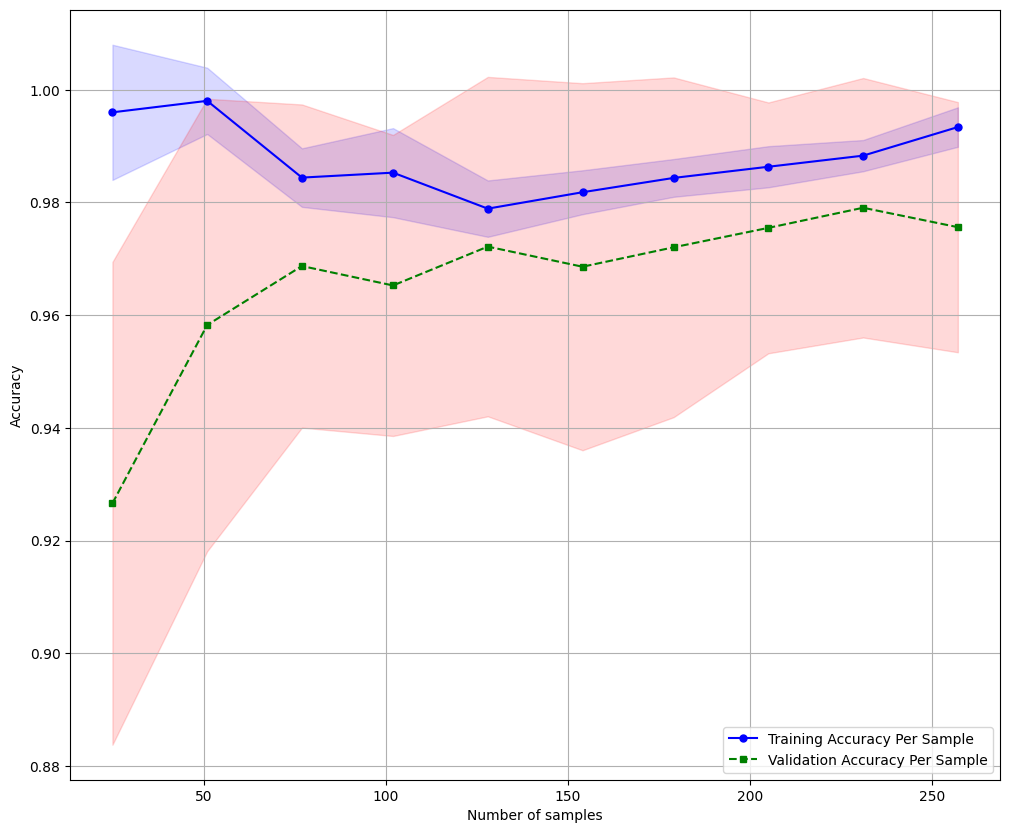

Confusion Matrix
[[ 60   4]
 [  0 107]]
Accuracy: 0.9766, Precision: 0.9640, Recall: 1.0000, F1: 0.9817, AUC: 0.9949


In [3]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', outlier_params)

models = {
    'knn': {'n_neighbors': 3, 'weights': 'uniform', 'algorithm': 'ball_tree', 'leaf_size': 45, 'p': 1},
    'lgbm': {'n_estimators': 9135, 'learning_rate': 0.0016024396694159682, 'num_leaves': 37, 'max_depth': 4, 'min_child_samples': 68, 'subsample': 0.6677437866386281, 'colsample_bytree': 0.8431618884275375, 'reg_alpha': 5.5918714115327136e-05, 'reg_lambda': 6.17885129525208e-07},
    'svc': {'C': 0.4481782611082687, 'kernel': 'linear', 'max_iter': 9915},
    'lr': {'penalty': 'l2', 'C': 15.75784488775011, 'solver': 'saga', 'max_iter': 930}
}
helper.train_and_evaluate_stacking_ensemble_model_with_optimized_models(models, True, df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


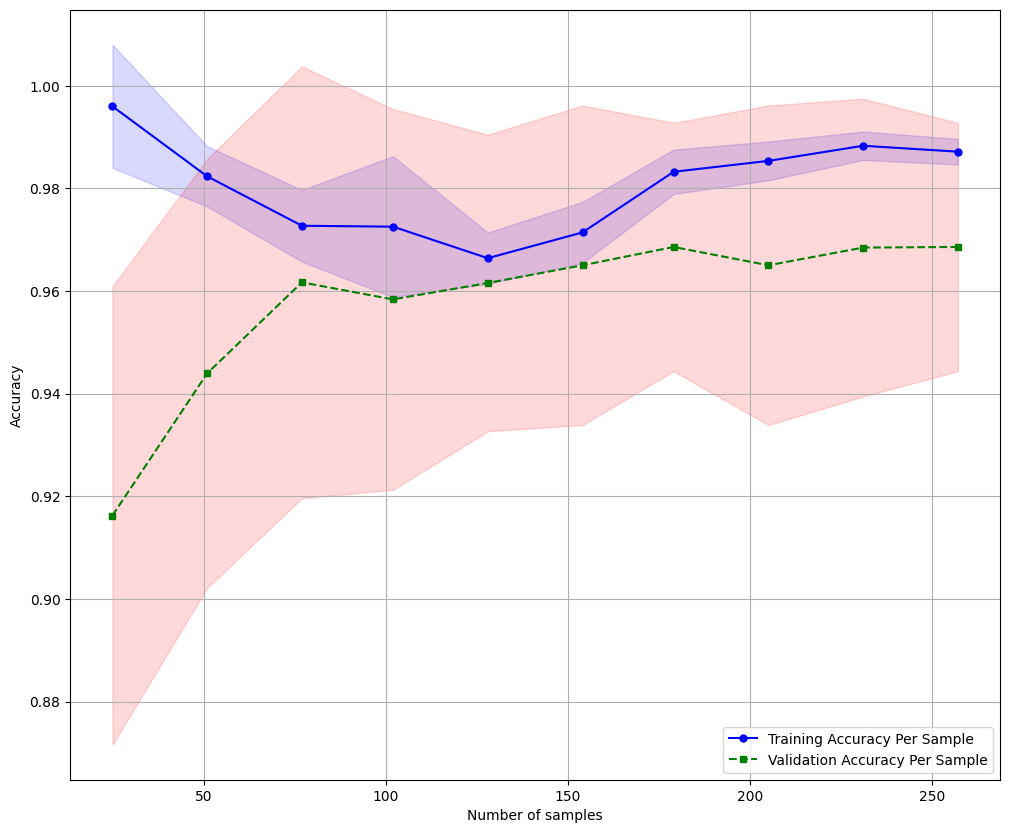

Confusion Matrix
[[ 58   6]
 [  0 107]]
Accuracy: 0.9649, Precision: 0.9469, Recall: 1.0000, F1: 0.9727, AUC: 0.9963


In [4]:
helper.train_and_evaluate_stacking_ensemble_model_with_optimized_models(models, False, df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)